# Anomaly detection

## Anomaly detection

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

 
data = loadmat('ex8data1.mat')  
X = data['X']   
# TODO: amount of data
X.shape

(307, 2)

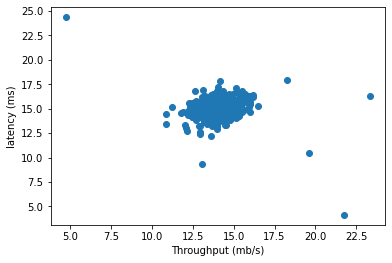

In [2]:
# TODO: visualise the dataset and look for anomalies
plt.scatter(X[:, 0], X[:, 1])  # plot for both features
plt.xlabel("Throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.show()

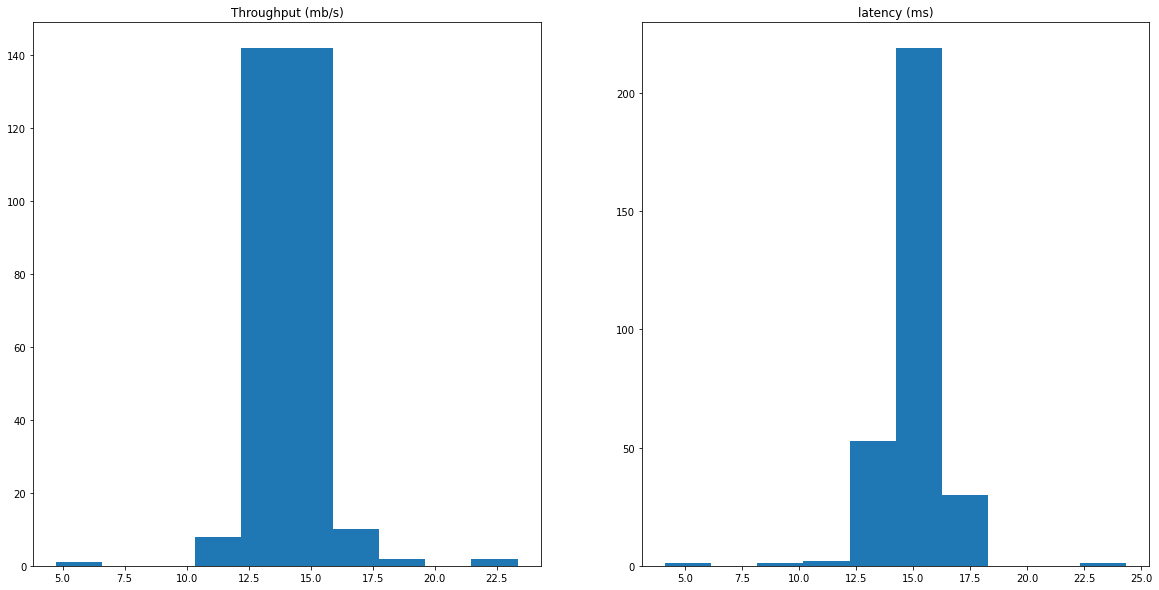

In [3]:
# TODO: plot the histogram for features: throughput (mb/s) and latency (ms).
plt.figure(figsize=(20, 10)) 

plt.subplot(121) 
plt.hist(X[:, 0])
plt.title("Throughput (mb/s)")

plt.subplot(122) 
plt.hist(X[:, 1])
plt.title("latency (ms)")
plt.show()

**Gaussian distribution**

In [4]:
def estimate_gaussian(X):  
    # TODO: calculate mu and sigma
    mu = np.mean(X, axis=0)
    sigma = np.var(X, axis=0)
    return mu, sigma
 
# TODO: run the function for your dataset
mu, sigma = estimate_gaussian(X)
(mu, sigma)

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

**Calculate probability**

In [5]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data (X.shape)
X.shape

(307, 2)

In [6]:
Xval.shape

(307, 2)

In [7]:
yval.shape

(307, 1)

In [8]:
from scipy import stats

# TODO: calculate the probability for X data
pdata = np.zeros((X.shape[0], X.shape[1])) 
pdata[:, 0] = stats.norm.pdf(X[:, 0], loc=mu[0], scale=np.sqrt(sigma[0]))
pdata[:, 1] = stats.norm.pdf(X[:, 1], loc=mu[1], scale=np.sqrt(sigma[1]))

In [9]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  

# TODO: calculate the probability for Xval data
# TODO: pval[:,0] =  
# TODO: pval[:,1] =
pval[:, 0] = stats.norm.pdf(Xval[:, 0], loc=mu[0], scale=np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], loc=mu[1], scale=np.sqrt(sigma[1]))

**Selecting the threshold**

In [14]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
    # TODO: select the best epsilon based on the F1 score
    thresholds = np.linspace(pval.min(), pval.max(), 10000)
    best_epsilon = pval.min()
    y_pred = np.logical_or(pval[:, 0] < best_epsilon, pval[:, 1] < best_epsilon).astype(int)
    best_f1 = f1_score(yval, y_pred)
    for threshold in thresholds:
        y_pred = np.logical_or(pval[:, 0] < threshold, pval[:, 1] < threshold).astype(int)
        f1_sc = f1_score(yval, y_pred)
        if f1_sc >= best_f1:
            best_epsilon = threshold
            best_f1 = f1_sc
    return best_epsilon, best_f1

best_epsilon, best_f1= select_threshold(pval, yval)
(best_epsilon, best_f1)

(0.0030818325746495285, 0.8750000000000001)

**Anomaly detection result**

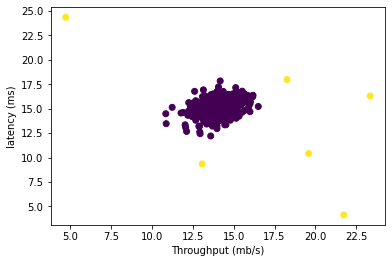

In [15]:
# TODO: find indexes where the p value is lower than epsilon. Use the np.where() function
ind = np.where(pdata < best_epsilon, 1, 0)
anomalies = np.logical_or(ind[:, 0], ind[:, 1]).astype(int)

# TODO: plot the data and analyse the outcome. Use plt.scatter() function
plt.scatter(X[:, 0], X[:, 1], c=anomalies)
plt.xlabel("Throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.show()